# ACCESS-OM2 1$^\circ$ Comparison

This notebook compares our first pre-release of ACCESS-OM2 with our (hopefully final) ACCESS-OM2 Pre-release, implemented at 1°.


## Current Status


|** Run Name** | **Forcing** | ** Run ** | ** Status **|
|--------------|---------|-------------------------------------------------|-------------|
|1deg_jra55_ryf_spinup8 | JRA55 V1.1 RYF9091| Same as spinup7, but update to Nic's new executable where we **think** the melt flux is now handled correctly. Turned Red Sea fix back on after year 4. This is running smoothly, but I can't get the timestep beyond 2160 (we are hoping for 3600).  | Stopped after 300 years. | 
|1deg_jra55v13_ryf9091_spinup_A | JRA55 V1.3 RYF9091|  Following spinup8, but with a number of minor changes including updating the JRA forcing to v1.3, input.nml fixes, changes to Bering Strait and Red Sea topography, a more complete diag_table etc. Timestep up to 3600 and model seems stable.| At year 40.| 

### Notes


**Last updated 4 November 2017**

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
cc.build_index()

Finding runs on disk...found 2642 run directories
Using database sqlite:////g/data1/v45/cosima-cookbook/cosima-cookbook.db
Querying database...runs already indexed: 2786
11 new run directories found including...
/g/data3/hh5/tmp/cosima/mom01v5/KDS75_WOA13/output004
/g/data3/hh5/tmp/cosima/mom01v5/KDS75_WOA13/output002
/g/data3/hh5/tmp/cosima/mom01v5/KDS75_WOA13/output009
...
Finding files on disk...


HBox(children=(IntProgress(value=0, max=11), HTML(value='')))


Files found but not yet indexed: 0
Indexing new .nc files...
[########################################] | 100% Completed |  0.1s
Found 0 new variables
Saving results in database...
Indexing complete.


True

## Experiments

In [3]:
configuration = 'access-om2'
expts = cc.get_experiments(configuration)

#configuration = 'mom-sis'
#expts.extend(cc.get_experiments(configuration))
display(expts)

['1deg_jra55_ryf8485_spinup1',
 '1deg_jra55_ryf8485_spinup2',
 '1deg_jra55_ryf_RCP45',
 '1deg_jra55_ryf_spinup1',
 '1deg_jra55_ryf_spinup2',
 '1deg_jra55_ryf_spinup3',
 '1deg_jra55_ryf_spinup4',
 '1deg_jra55_ryf_spinup5',
 '1deg_jra55_ryf_spinup6',
 '1deg_jra55_ryf_spinup7',
 '1deg_jra55_ryf_spinup8',
 '1deg_jra55_ryf_spinup9',
 '1deg_jra55v13_ryf9091_spinup_A']

In [2]:
# This subset of cases are the important ones
esub = ['1deg_jra55_ryf_spinup8',
 '1deg_jra55v13_ryf9091_spinup_A',
       ]

## Wind Stress
Just a simple plot showing zonally averaged zonal wind stress from each case.

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

/home/157/amh157/cosima-cookbook/cosima_cookbook/netcdf_index.py:269: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  decoded_time = xr.conventions.decode_cf_datetime(dataarray.time, time_units)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


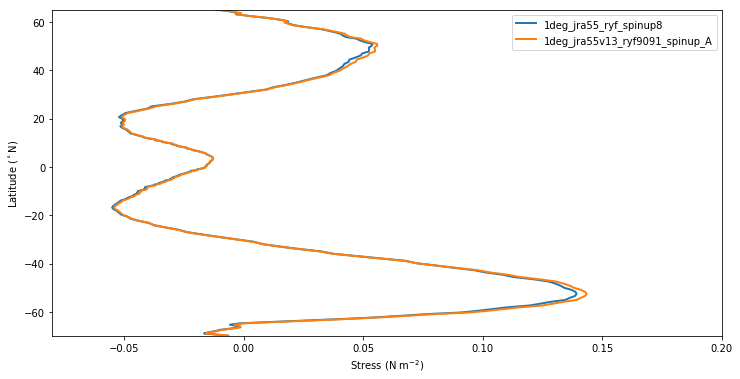

In [5]:
cc.plots.wind_stress(esub)

## Ocean Scalars
The following series of plots shows global timeseries of key metrics.

In [6]:
# If you want to clear stuff
# cc.diagnostics.annual_scalar.clear()

HBox(children=(IntProgress(value=0, description='variables: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

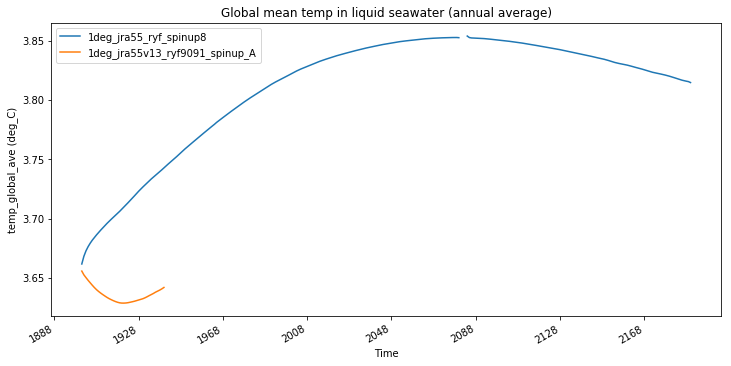

In [6]:
cc.plots.annual_scalar(esub, 'temp_global_ave')

HBox(children=(IntProgress(value=0, description='variables: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

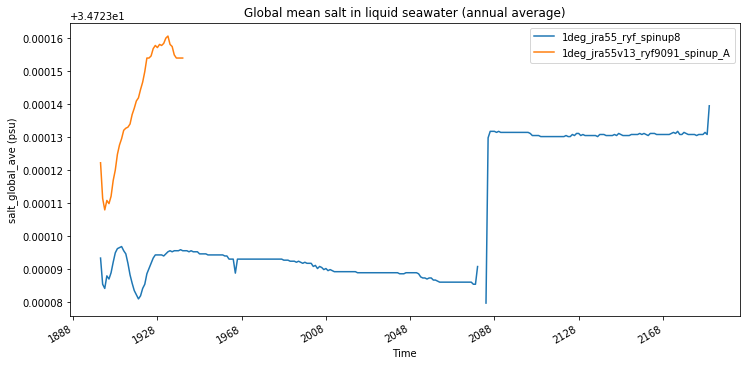

In [7]:
cc.plots.annual_scalar(esub, 'salt_global_ave')

HBox(children=(IntProgress(value=0, description='variables: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

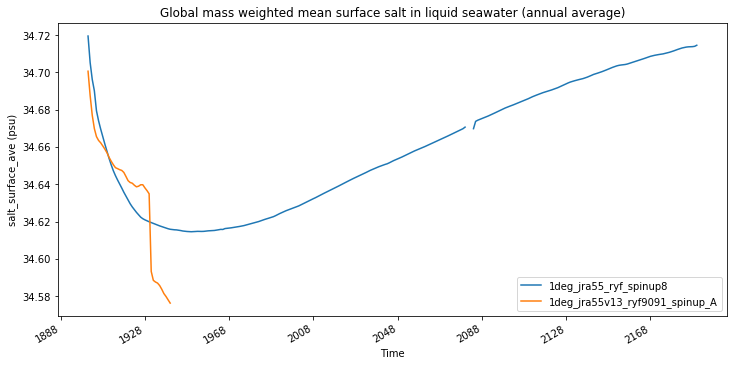

In [8]:
cc.plots.annual_scalar(esub, 'salt_surface_ave')

HBox(children=(IntProgress(value=0, description='variables: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

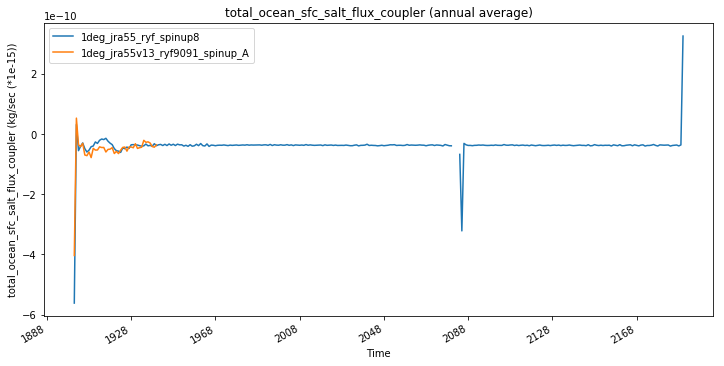

In [9]:
cc.plots.annual_scalar(esub, 'total_ocean_sfc_salt_flux_coupler')

HBox(children=(IntProgress(value=0, description='variables: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

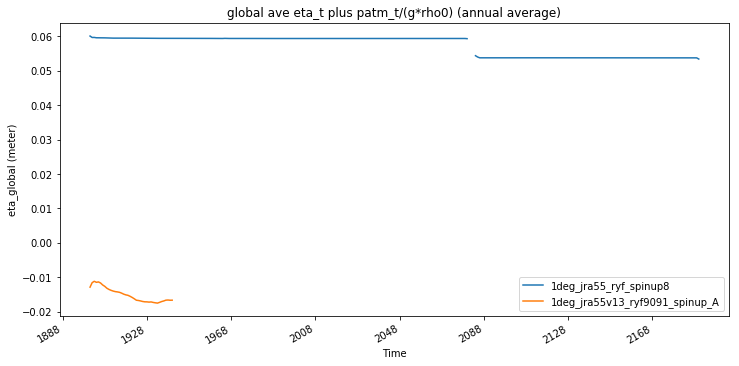

In [10]:
cc.plots.annual_scalar(esub, 'eta_global')

In [10]:
variables = cc.netcdf_index.get_scalar_variables(configuration)

In [11]:
from ipywidgets import widgets, interact, interactive, fixed
interactive(cc.plots.annual_scalar,
            expts=fixed(esub),
            variable=widgets.Dropdown(options=variables, description='Scalar Variable:'))

interactive(children=(Dropdown(description='variables', options=(), value=None), Output()), _dom_classes=('widget-interact',))

# Drake Passage Transport

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

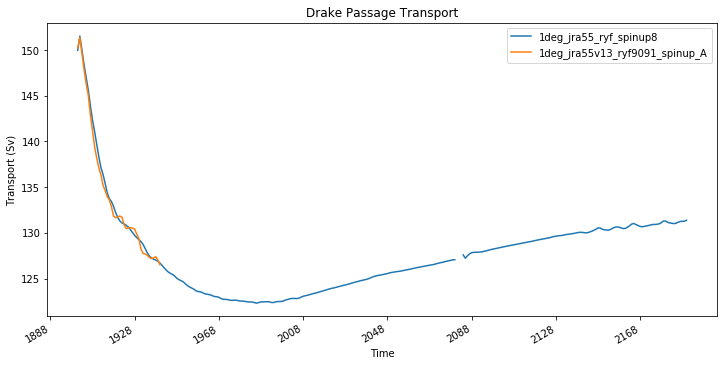

In [11]:
cc.plots.drake_passage(esub)

# Meridional Overturning Circulation

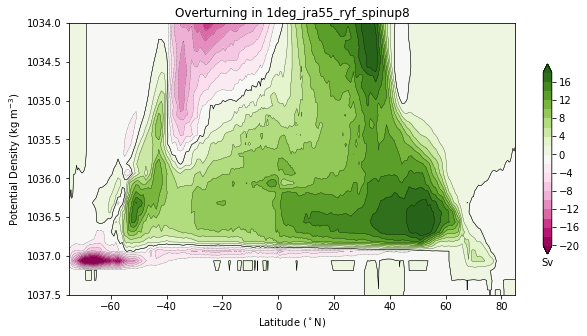

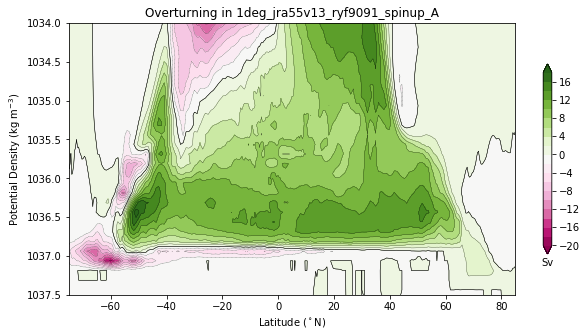

In [3]:
for e in esub: 
    cc.plots.psi_avg(e,10,GM=True)

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

Calculating 1deg_jra55_ryf_spinup8 timeseries of AABW transport at 55S 
Calculating 1deg_jra55v13_ryf9091_spinup_A timeseries of AABW transport at 55S 


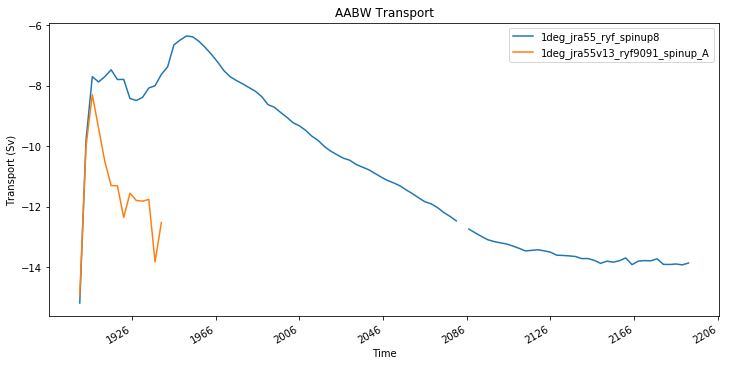

In [4]:
cc.plots.aabw(esub, GM=True)

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

Calculating 1deg_jra55_ryf_spinup8 timeseries of AMOC transport at 26N 
Calculating 1deg_jra55v13_ryf9091_spinup_A timeseries of AMOC transport at 26N 


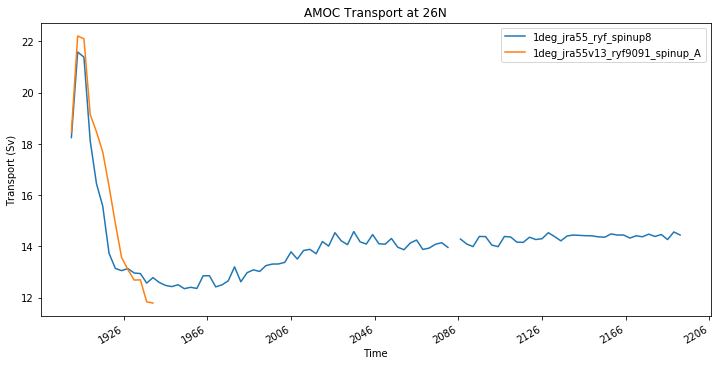

In [5]:
cc.plots.amoc(esub, GM=True)

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

Calculating 1deg_jra55_ryf_spinup8 timeseries of AMOC transport at 35S 
Calculating 1deg_jra55v13_ryf9091_spinup_A timeseries of AMOC transport at 35S 


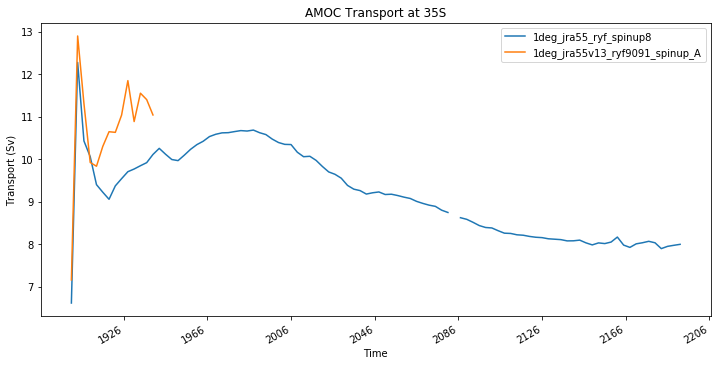

In [6]:
cc.plots.amoc_south(esub, GM=True)

# Sea Surface Temperature
LH column shows SST, RH column shows difference from Year 1.

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


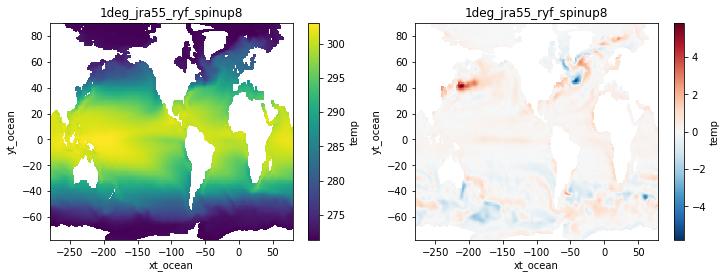

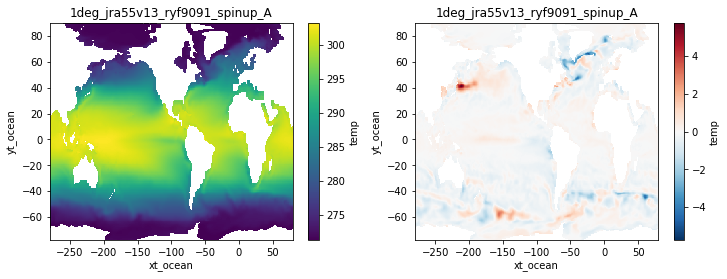

In [7]:
cc.plots.sea_surface_temperature(esub)

In [5]:
reftemp = cc.get_nc_variable('10', 'woa13_ts_12_mom10.nc', 'temp',time_units = 'days since 1900-01-01').isel(ZT=0)

In [6]:
reftemp

<xarray.DataArray 'temp' (time: 1, GRID_Y_T: 300, GRID_X_T: 360)>
dask.array<getitem, shape=(1, 300, 360), dtype=float64, chunksize=(1, 100, 120)>
Coordinates:
  * GRID_X_T  (GRID_X_T) float64 -279.5 -278.5 -277.5 -276.5 -275.5 -274.5 ...
  * GRID_Y_T  (GRID_Y_T) float64 -77.88 -77.63 -77.38 -77.13 -76.88 -76.63 ...
    ZT        float64 5.0
  * time      (time) datetime64[ns] 1900-01-13
Attributes:
    long_name:  potential temperature calculated using teos10 from objectivel...
    units:      degrees celsius

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


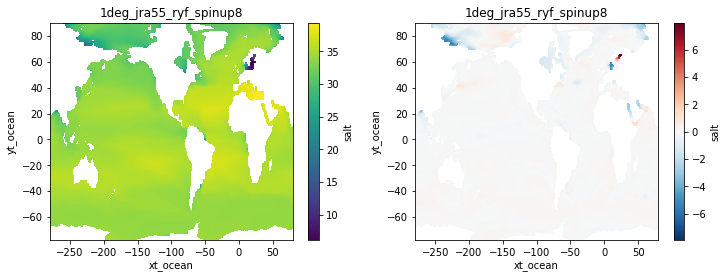

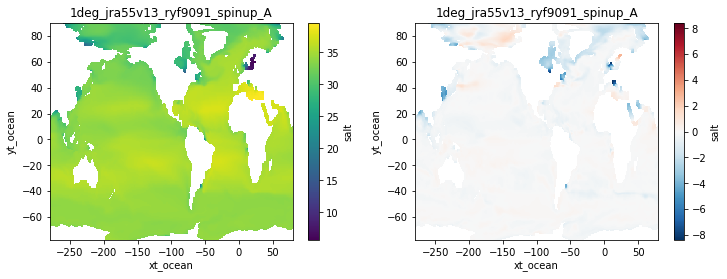

In [8]:
cc.plots.sea_surface_salinity(esub)

# Zonal Mean transects

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


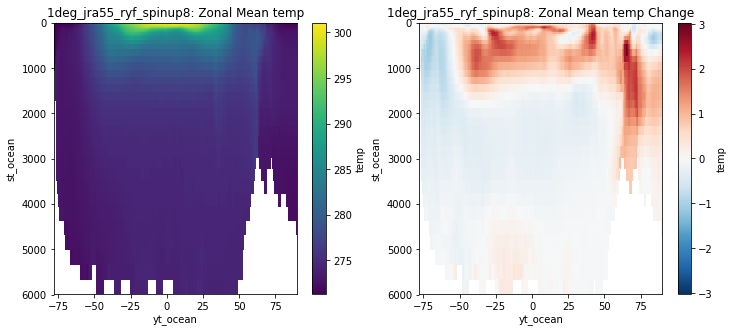

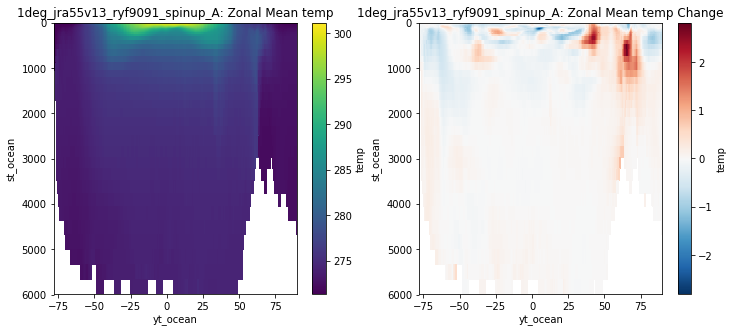

In [9]:
cc.plots.zonal_mean(esub[:2],'temp',n=10)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


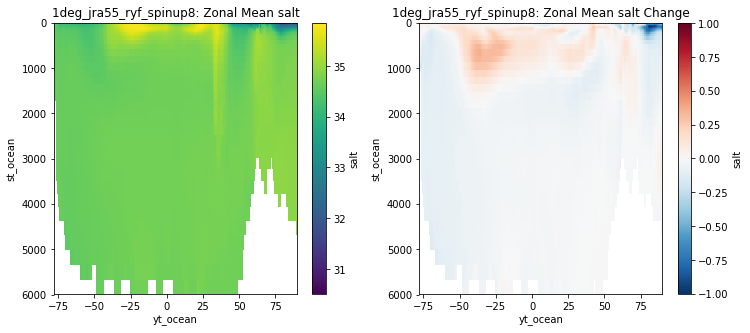

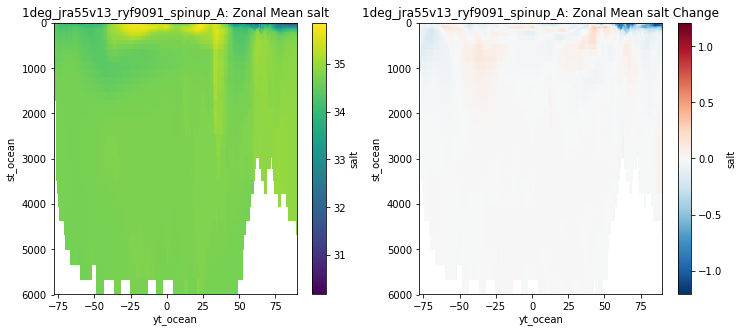

In [10]:
cc.plots.zonal_mean(esub[:2],'salt',n=10)